In [110]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_breast_cancer
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px 

scaler = StandardScaler()

In [111]:
# Buscando o df
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [112]:
df = df.drop(columns=['alive', 'embark_town', 'class'])

In [130]:
df['family_size'] = df['sibsp']+df['parch']

<Axes: >

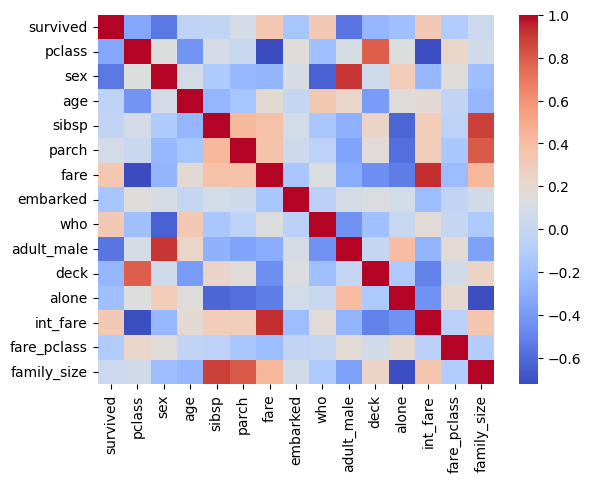

In [131]:
df_numeric = df.copy()

colunas_quali = [col for col in df.columns if 'int' not in str(df[col].dtype).lower() or 'float' not in str(df[col].dtype).lower()]

encoders = {}

for col in colunas_quali:
    le = LabelEncoder()
    df_numeric[col] = le.fit_transform(df_numeric[col])
    encoders[col] = le

corr = df_numeric.corr()
sns.heatmap(corr, cmap='coolwarm')

In [114]:
df['int_fare'] = round(df['fare']).astype(int)
df['fare_pclass'] = df['int_fare'].astype(str)+','+df['pclass'].astype(str)

<Axes: >

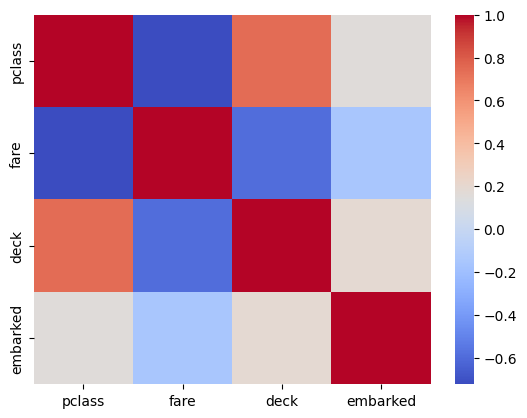

In [115]:
corr = df_numeric[['pclass', 'fare', 'deck', 'embarked']].corr()
sns.heatmap(corr, cmap='coolwarm')

In [116]:
px.histogram(df.sort_values(by='fare'), x='fare_pclass', color='deck')

In [117]:
def replace_with_mode(group):
    mode_deck = group['deck'].mode()
    if not mode_deck.empty:
        group['deck'] = group['deck'].fillna(mode_deck[0])
    return group

df = df.groupby('fare_pclass').apply(replace_with_mode).reset_index(drop=True)

/var/folders/gl/nlbr9h6d001c6mdh1d8sy7fc0000gp/T/ipykernel_2370/955904421.py:7: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [119]:
def replace_with_median(group):
    median_age = group['age'].median()
    group['age'] = group['age'].fillna(median_age)
    return group

df = df.groupby('pclass').apply(replace_with_median).reset_index(drop=True)

/var/folders/gl/nlbr9h6d001c6mdh1d8sy7fc0000gp/T/ipykernel_2370/1137479912.py:6: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [129]:
df.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
who              0
adult_male       0
deck           314
alone            0
int_fare         0
fare_pclass      0
family_size      0
dtype: int64